In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import random
from ipyleaflet import Map, Circle
import seaborn as sns
sns.set()
from IPython.display import display

Using TensorFlow backend.


# Prepare the Data

In [2]:
df = pd.read_csv('places.csv')
#shuffel the places
df = df.sample(frac=0.4).reset_index(drop=True)

# # Generate more data
# for index, row in df.iterrows():
#     for i in range(4):
#         df.loc[len(df)] = [
#             row['lat'] + random.uniform(-2/100000, 2/100000),
#             row['lng'] + random.uniform(-2/100000, 2/100000),
#             row['heading'] + random.uniform(-1, 1),
#             row['isMatch']
#         ]
#norm_df = (df - df.min()) / (df.max() - df.min())

inputMatrix = df[['lat', 'lng', 'heading']].as_matrix()
target = df['isMatch'].as_matrix()

df

,lat,lng,heading,isMatch
0,43.646137,-79.398493,270.990096,False
1,43.645900,-79.393044,46.417065,True
2,43.644365,-79.394649,86.713719,False
3,43.645063,-79.394706,0.000000,False
4,43.643807,-79.395620,52.317717,False
5,43.644131,-79.390167,0.000000,False
6,43.645264,-79.391155,57.128936,False
7,43.645572,-79.400538,0.000000,False
8,43.646390,-79.390795,57.651793,True
9,43.646485,-79.395558,0.000000,False


# Visualize the Data

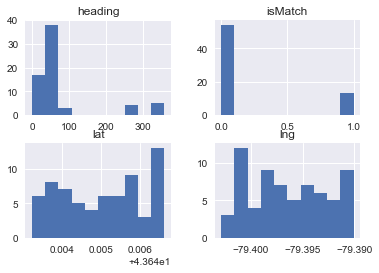

Widget Javascript not detected.  It may not be installed or enabled properly.


In [3]:
df.hist()
plt.show()

map = Map(center=[df.lat.mean(), df.lng.mean()], zoom=17)

def addPoint(map, lat, lng, isMatch, predicted_match=None):
    if not (predicted_match is None) and predicted_match != isMatch:
        color = '#f44'
    else:
        color = '#44F' if isMatch else '#999'
    map.add_layer(Circle(location=[lat, lng], radius=8, color=color, opacity=.7, fill_opacity=.7, fill_color=color))

for index, row in df.iterrows():
    addPoint(map, lat=row.lat, lng=row.lng, isMatch=row.isMatch)

map

# Train the Model
### Sigmoid Activation Function
![python-trends](img/sigmoid.png)

In [4]:
def get_model():
    model = Sequential()
    model.add(Dense(30, input_dim=len(inputMatrix[0]), activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

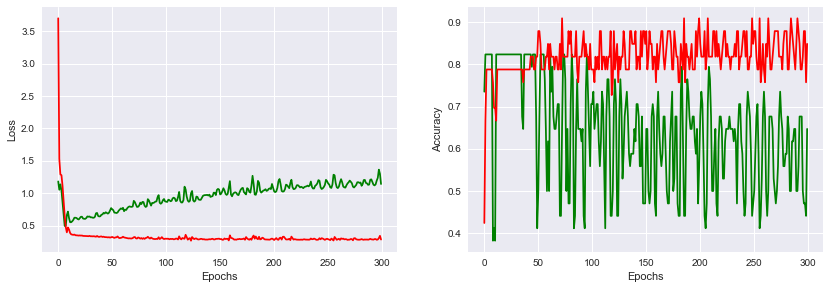

Accuracy: 64.71%


In [5]:
model = get_model()

training_data = model.fit(inputMatrix, target, validation_split=0.5, epochs=300, batch_size=10, verbose=False)

fig, axis = plt.subplots(1,2)
fig.set_size_inches(14, 4.5)
axis[0].plot(training_data.history['val_loss'], 'g', training_data.history['loss'], 'r')
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[1].plot(training_data.history['val_acc'], 'g', training_data.history['acc'], 'r')
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
plt.show()

print('Accuracy: %.2f%%' % (training_data.history['val_acc'][-1]*100))

# Measure Performance
K-Fold Cross Validation

In [6]:
estimator = KerasClassifier(build_fn=get_model, epochs=200, batch_size=10, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, inputMatrix, target, cv=kfold)
print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

Accuracy: 79.19% (2.17%)


# Visualize the Model

In [7]:
map = Map(center=[df.lat.mean(), df.lng.mean()], zoom=17)

for index, input_row in enumerate(inputMatrix):
    predicted_match = model.predict(np.array([input_row])) > 0.5;
    raw_row = df.loc[index]
    addPoint(map, lat=raw_row.lat, lng=raw_row.lng, isMatch=raw_row.isMatch, predicted_match=predicted_match)

map

Widget Javascript not detected.  It may not be installed or enabled properly.
